<a href="https://www.kaggle.com/code/aisuko/eda-ai-topics-with-pca-and-t-sne?scriptVersionId=175065997" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -U -q pyod==1.1.3
!pip install -U -q prince==0.13.0

In [2]:
import pandas as pd


topics = [
    "Explore how AGI agents can facilitate collaborative learning experiences among students, teachers, and the agents themselves, fostering a dynamic educational ecosystem.",
    "Explore advanced reinforcement learning algorithms to enhance the decision-making capabilities of AGI, ensuring effective adaptation to educational scenarios.",
    "Examine strategies for improving coordination and communication among multiple autonomous agents to achieve collective goals and tasks in education.",
    "Develop models that enable AGI to mimic human-like cognitive processes, enhancing their ability to understand and respond to dynamic situations in teaching and learning.",
    "Investigate methods to make the educational decision-making processes of AGI more transparent and interpretable, addressing concerns related to accountability and trust.", 
    "Develop and refine metrics for evaluating the effectiveness of AGI in supporting teaching and learning, considering both quantitative and qualitative measures.",
    "Investigate how the use of AGI influences cognitive development in learners, examining factors such as critical thinking, problem-solving skills, and creativity.",
    "Explore strategies for training and supporting educators in integrating AGI into their teaching practices, ensuring effective collaboration between teachers and intelligent agents.",
    "Examine the learning experiences between humans and AGI in educational settings, identifying optimal approaches for enhancing different models of collaboration.",
    "Investigate security and privacy challenges associated with the deployment of AGI in educational contexts, proposing robust solutions to protect sensitive information.",
    "Showcase recent advancements in educational technology driven by AGI.",
    "Evaluate the effectiveness of knowledge transfer and co-creation processes between AGI and learners, developing methodologies to investigate how emergent knowledge is transferred between AI and human learners.",
    "Develop quantitative metrics to measure and evaluate emergent behaviors within educational frameworks, providing a systematic approach for analysis.",
    "Investigate how adaptive learning environments, facilitated by AGI, generate emergent patterns in human-machine interaction and how these patterns contribute to the learning process.",
    "Examine the co-evolutionary relationship between AGI and human teachers, focusing on how instructional strategies evolve through continuous interaction and feedback.",
    "Analyze the emergence of shared understanding in collaborative learning spaces where AGI collaborates with human learners, exploring the co-evolutionary processes that lead to emergent behaviors.",
    "Investigate the ethical implications of collaborative learning spaces exploring how these behaviors impact the learning experience and identifying ethical considerations in their design and deployment.", 
    "Conduct studies to assess the impact of the co-evolutionary relationship between AGI and students on academic performance, satisfaction, and overall learning outcomes.",
    "Explore the transferability of knowledge co-created in educational contexts to real-world problem-solving scenarios, assessing the practical applicability of the emergent knowledge generated by AGI."
]

df=pd.DataFrame({"Topics": topics})

# Basic EDA with Kmeans

In [3]:
import copy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming you have the 'topics' list and 'df' DataFrame from previous responses

# 1. Text Preprocessing and TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Topics'])

# 2. KMeans Clustering (example with 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
cluster_predict=kmeans.fit(tfidf_matrix)

print(cluster_predict)
print(np.unique(cluster_predict))

df_basic=copy.deepcopy(df)
# 3. Add Cluster Labels to DataFrame
df_basic['Cluster'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)
[KMeans(n_clusters=5, random_state=42)]


In [4]:
df_basic.head(len(topics))

,Topics,Cluster
0,Explore how AGI agents can facilitate collabor...,3
1,Explore advanced reinforcement learning algori...,2
2,Examine strategies for improving coordination ...,3
3,Develop models that enable AGI to mimic human-...,4
4,Investigate methods to make the educational de...,2
5,Develop and refine metrics for evaluating the ...,4
6,Investigate how the use of AGI influences cogn...,0
7,Explore strategies for training and supporting...,3
8,Examine the learning experiences between human...,1
9,Investigate security and privacy challenges as...,1


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_df = pd.DataFrame({'x': reduced_features[:, 0], 'y': reduced_features[:, 1], 'cluster': df_basic['Cluster']})

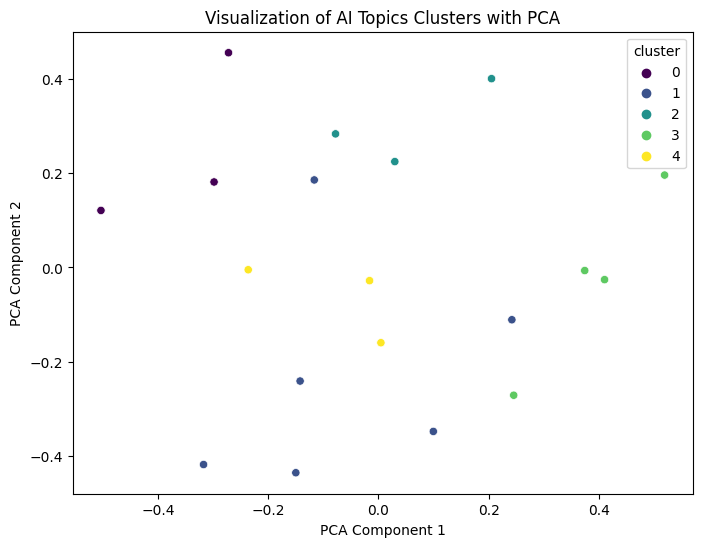

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=reduced_df, palette='viridis')
plt.title('Visualization of AI Topics Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualization in 2D and 3D

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# create new binary features(dummy vatriables) for each unique category
# each new feature represents the presence of absence of a specific category
from sklearn.preprocessing import OneHotEncoder

# power_transformer=Pipeline(steps=[("encoder", PowerTransformer())])
onehot_transformer=Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))]
)


preprocessor=ColumnTransformer(
    transformers=[
        ("onehot_transformer", onehot_transformer,["Topics"])
    ]
)

pipe=Pipeline(steps=[("preprocesor", preprocessor)])

pipe_fit=pipe.fit(df)

data=pd.DataFrame(
    pipe_fit.transform(df),
    columns=pipe_fit.get_feature_names_out().tolist()
)

data.columns.tolist()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['onehot_transformer__Topics_Conduct studies to assess the impact of the co-evolutionary relationship between AGI and students on academic performance, satisfaction, and overall learning outcomes.',
 'onehot_transformer__Topics_Develop and refine metrics for evaluating the effectiveness of AGI in supporting teaching and learning, considering both quantitative and qualitative measures.',
 'onehot_transformer__Topics_Develop models that enable AGI to mimic human-like cognitive processes, enhancing their ability to understand and respond to dynamic situations in teaching and learning.',
 'onehot_transformer__Topics_Develop quantitative metrics to measure and evaluate emergent behaviors within educational frameworks, providing a systematic approach for analysis.',
 'onehot_transformer__Topics_Evaluate the effectiveness of knowledge transfer and co-creation processes between AGI and learners, developing methodologies to investigate how emergent knowledge is transferred between AI and human 

In [8]:
from pyod.models.ecod import ECOD

clf=ECOD()
clf.fit(data)
outliers=clf.predict(data)

data["outliers"]=outliers

# data without outliers
data_no_outliers=data[data["outliers"]==0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

print(data_no_outliers.shape)
print(data_with_outliers.shape)

(19, 18)
(19, 18)


In [9]:
df["outliers"] = outliers
# Original Data with Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)
print(df_no_outliers.shape)

(19, 1)


# Modeling

One of the disadvanatges of using the Kmeans algorithm is taht we must choose the number of clusters we want to use.

We will use Elbow Method here. It consists of calculating the distorition that exists between the points of a cluster and its centroid.

/opt/conda/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


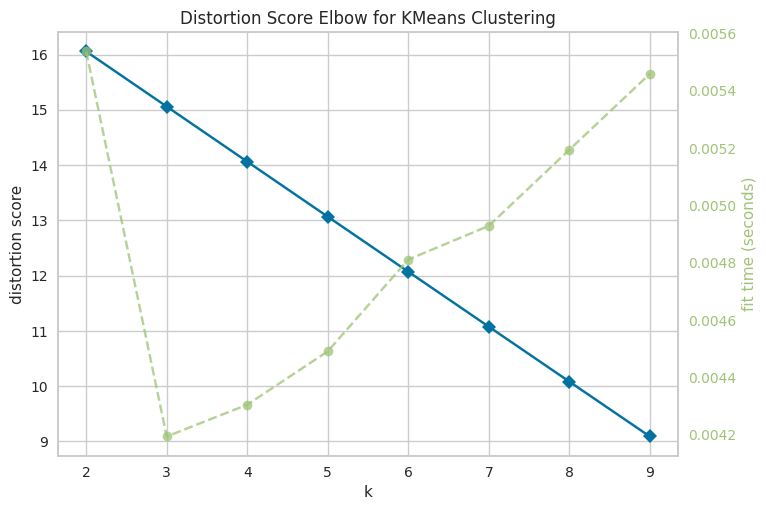

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show() 

# Optimization

In [11]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

# data visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np

def make_Silhouette_plot(X, n_clusters):
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg,
    )
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=26)
        plt.xlabel("The silhouette coefficient values", fontsize=24)
        plt.ylabel("Cluster label", fontsize=24)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    print(f"N cluster: {n_clusters}")
    make_Silhouette_plot(data_no_outliers, n_clusters)   
    plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
    plt.close()

N cluster: 2
For n_clusters = 2 The average silhouette_score is : 0.015415432569128792
N cluster: 3
For n_clusters = 3 The average silhouette_score is : 0.01541543256912884
N cluster: 4
For n_clusters = 4 The average silhouette_score is : 0.0154154325691289
N cluster: 5
For n_clusters = 5 The average silhouette_score is : 0.015415432569128923
N cluster: 6
For n_clusters = 6 The average silhouette_score is : 0.015415432569128914
N cluster: 7
For n_clusters = 7 The average silhouette_score is : 0.015415432569128973
N cluster: 8
For n_clusters = 8 The average silhouette_score is : 0.015415432569128931
N cluster: 9
For n_clusters = 9 The average silhouette_score is : 0.015415432569129023


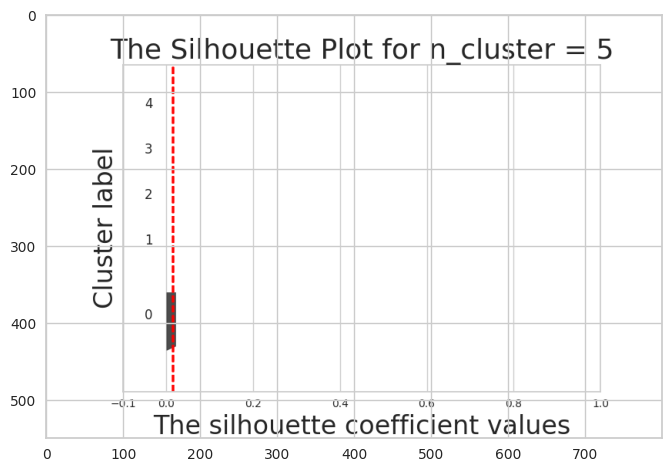

In [12]:
from PIL import Image

img=Image.open('/kaggle/working/Silhouette_plot_5.png').convert('RGB')
img=np.asarray(img)
plt.imshow(np.array(img))

In [13]:
km = KMeans(n_clusters=4,
            init='k-means++', 
            n_init=10,
            max_iter=100, 
            random_state=42)

clusters_predict = km.fit_predict(data_no_outliers)
clusters_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [14]:
np.unique(clusters_predict)

array([0, 1, 2, 3], dtype=int32)

# Evaluation

Three ways of evaluating kmeans models is somewhat more open that for other models, like:

* metrics
* visualization
* interpretation

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similat cluster,
where similarity is the ratio of within-clsuter distances to between-cluster distances
"""

print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")


"""
Calinski Harabaz Index -> Variance Ratio Criterion.

Calinski Harabaz Index is defined as the ratio of the 
sum of between-cluster dispersion and of within-cluster dispersion.

The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of 
fit of a clustering algorithm, but can also be used as 
a method for determining an optimal value of k (see here for more).

Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either
the data or the value of k is incorrect.

1 is the ideal value and indicates that clusters are very 
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 0.8951154325194378
Calinski Score: 1.063157894736842
Silhouette Score: 0.015415432569128897


# Visualization

Here we use the method to reduce dimensionality, PCA. For them we are going to use the Prince libs, focused on exploratory analysis and dimensionality reduction.

In [16]:
# Calculation the principal components in 2D and 3D

import prince
import plotly.express as px

def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df, 
                        x=columns[0], 
                        y=columns[1], 
                        z=columns[2],
                        color='cluster',
                        template="plotly",
                        
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000, 
                                height = 800, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
    
    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df, 
                        x=columns[0], 
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800, 
                                height = 700, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                        
        
    fig.show()
    
    
# PCA 3D

pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              1.056         5.86%                      5.86%
1              1.056         5.86%                     11.73%
2              1.056         5.86%                     17.59%


# PCA 2D

In [17]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# T-SNE

In [18]:
from sklearn.manifold import TSNE

sampling_data = data_no_outliers.sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.5, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3, 
                  learning_rate=500, 
                  init='random', 
                  perplexity=5, 
                  n_iter = 5000,
                  n_jobs=-1).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title = "TSNE Space", opacity=1, width_line = 0.1)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# T-SNE 2D

In [19]:
df_tsne_2d = TSNE(
                  n_components=2, 
                  learning_rate=500, 
                  init='random', 
                  perplexity=5, 
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["comp1", "comp2"])
df_tsne_2d["cluster"] = sampling_clusters

plot_pca_2d(df_tsne_2d, title = "TSNE Space", opacity=1, width_line = 0.5)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

